In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns

In [3]:
pwd

u'/home/lejay/research/Winter_2018'

## Evolution: Split for sf/q and mass bins

In [2]:
# combine results from 4 deep layer catalogs and SXDS_uddd

def combine_deep(sfq, mass_bin, z, mode='count'):
    radial_COSMOS = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'COSMOS_deep_'+sfq+'_'+mass_bin+'_'+str(z)+'.npy')
    radial_DEEP = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'DEEP_deep_'+sfq+'_'+mass_bin+'_'+str(z)+'.npy')
    radial_SXDS = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'SXDS_uddd_'+sfq+'_'+mass_bin+'_'+str(z)+'.npy')
    radial_ELAIS = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'ELAIS_deep_'+sfq+'_'+mass_bin+'_'+str(z)+'.npy')
    radial_XMM = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'XMM-LSS_deep_'+sfq+'_'+mass_bin+'_'+str(z)+'.npy')
    
    radial_COSMOS_err = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'COSMOS_deep_'+sfq+'_'+mass_bin+'_'+str(z)+'_err.npy')
    radial_DEEP_err = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'DEEP_deep_'+sfq+'_'+mass_bin+'_'+str(z)+'_err.npy')
    radial_SXDS_err = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'SXDS_uddd_'+sfq+'_'+mass_bin+'_'+str(z)+'_err.npy')
    radial_ELAIS_err = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'ELAIS_deep_'+sfq+'_'+mass_bin+'_'+str(z)+'_err.npy')
    radial_XMM_err = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'XMM-LSS_deep_'+sfq+'_'+mass_bin+'_'+str(z)+'_err.npy')
    
    if z==0.6:
        radial_total = (radial_COSMOS*598+radial_XMM*467+radial_ELAIS*401+radial_SXDS*178+radial_DEEP*446)/(598.+467+401+178+446)
        radial_total_err = np.sqrt(radial_COSMOS_err**2*598**2+radial_XMM_err**2*467**2+radial_ELAIS_err**2*401**2+radial_SXDS_err**2*178**2+radial_DEEP_err**2*446**2)/(598.+467+401+178+446)
    elif z==0.3:
        radial_total = (radial_COSMOS*316+radial_XMM*247+radial_ELAIS*228+radial_SXDS*92+radial_DEEP*189)/(316.+247+228+92+189)
        radial_total_err = np.sqrt(radial_COSMOS_err**2*316**2+radial_XMM_err**2*247**2+radial_ELAIS_err**2*228**2+radial_SXDS_err**2*98**2+radial_DEEP_err**2*198**2)/(316.+247+228+92+189)
    else:
        radial_total = 0
        radial_total_err = 0
                               
    return radial_total, radial_total_err

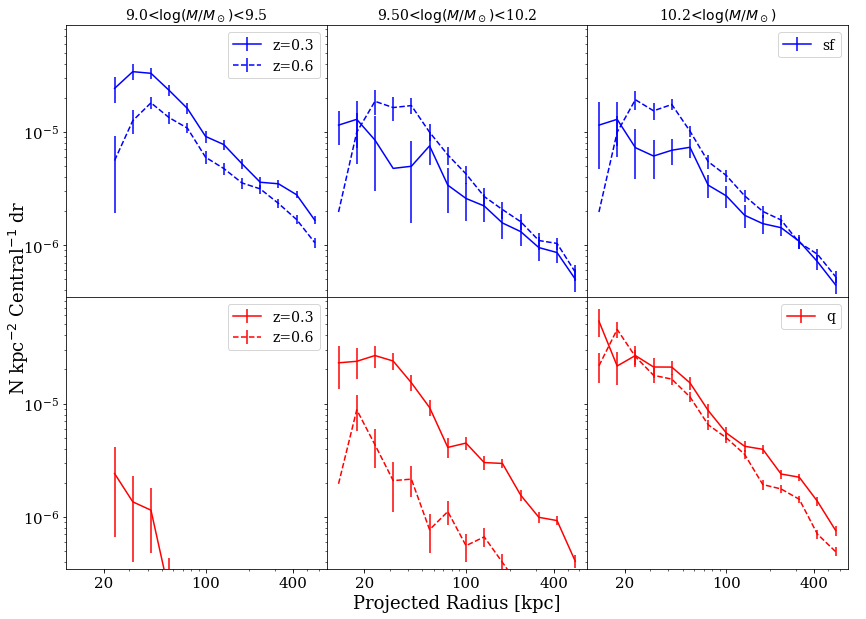

In [4]:
radial_3_sf_l = combine_deep('sf','9.0',0.3)
radial_3_sf_m = combine_deep('sf','9.5',0.3)
radial_3_sf_h = combine_deep('sf','10.2',0.3)
radial_3_q_l = combine_deep('q','9.0',0.3)
radial_3_q_m = combine_deep('q','9.5',0.3)
radial_3_q_h = combine_deep('q','10.2',0.3)
radial_6_sf_l = combine_deep('sf','9.0',0.6)
radial_6_sf_m = combine_deep('sf','9.5',0.6)
radial_6_sf_h = combine_deep('sf','10.2',0.6)
radial_6_q_l = combine_deep('q','9.0',0.6)
radial_6_q_m = combine_deep('q','9.5',0.6)
radial_6_q_h = combine_deep('q','10.2',0.6)

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(14, 10))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
bin_edges = np.load('bin_edges.npy')
# Plot each graph, and manually set the y tick values
axs[0][0].errorbar(bin_edges[1:], radial_3_sf_l[0], yerr=radial_3_sf_l[1], fmt='b',label='z=0.3')
axs[0][0].errorbar(bin_edges[1:], radial_6_sf_l[0], yerr=radial_6_sf_l[1], fmt='--b',label='z=0.6')

axs[0][0].set_title(r'9.0<$\log(M/M_\odot)$<9.5',fontsize=14)
axs[0][0].set_xlabel('Projected Radius [kpc]', fontsize=14)
axs[0][0].legend(fontsize=14)

axs[0][1].errorbar(bin_edges[1:], radial_3_sf_m[0], yerr=radial_3_sf_m[1], fmt='b')
axs[0][1].errorbar(bin_edges[1:], radial_6_sf_m[0], yerr=radial_6_sf_m[1], fmt='--b')
axs[0][1].set_xlabel('Projected Radius [kpc]', fontsize=14)
axs[0][1].set_title(r'9.50<$\log(M/M_\odot)$<10.2',fontsize=14)

axs[0][2].errorbar(bin_edges[1:], radial_3_sf_h[0], yerr=radial_3_sf_h[1],fmt='b',label='sf')
axs[0][2].errorbar(bin_edges[1:], radial_6_sf_h[0], yerr=radial_6_sf_h[1],fmt='--b')
axs[0][2].set_title(r'10.2<$\log(M/M_\odot)$',fontsize=14)
axs[0][2].legend(fontsize=14)

axs[1][0].errorbar(bin_edges[1:], radial_3_q_l[0], yerr=radial_3_q_l[1],fmt='r',label='z=0.3')
axs[1][0].errorbar(bin_edges[1:], radial_6_q_l[0], yerr=radial_6_q_l[1],fmt='--r',label='z=0.6')
axs[1][0].legend(fontsize=14)

axs[1][1].errorbar(bin_edges[1:], radial_3_q_m[0], yerr=radial_3_q_m[1],fmt='r')
axs[1][1].errorbar(bin_edges[1:], radial_6_q_m[0], yerr=radial_6_q_m[1],fmt='--r')


axs[1][2].errorbar(bin_edges[1:], radial_3_q_h[0], yerr=radial_3_q_h[1],fmt='r',label='q')
axs[1][2].errorbar(bin_edges[1:], radial_6_q_h[0], yerr=radial_6_q_h[1],fmt='--r')
axs[1][2].legend(fontsize=14)

axs[0][0].set_yscale('log')
axs[0][0].set_xscale('log')
axs[0][0].set_xticks([20, 100, 400])
axs[0][0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel('Projected Radius [kpc]', fontsize=18)
plt.ylabel(r'N kpc$^{-2}$ Central$^{-1}$ dr',fontsize=18)
plt.savefig('splitting.png')
plt.show()

/home/lejay/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  


[0.1179075  0.12274271 0.12507891 0.15579686 0.13052993 0.08955148
 0.117205   0.09118554 0.07591016 0.06696727 0.069849   0.06566786
 0.05377047 0.06363938]


/home/lejay/.local/lib/python2.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in divide


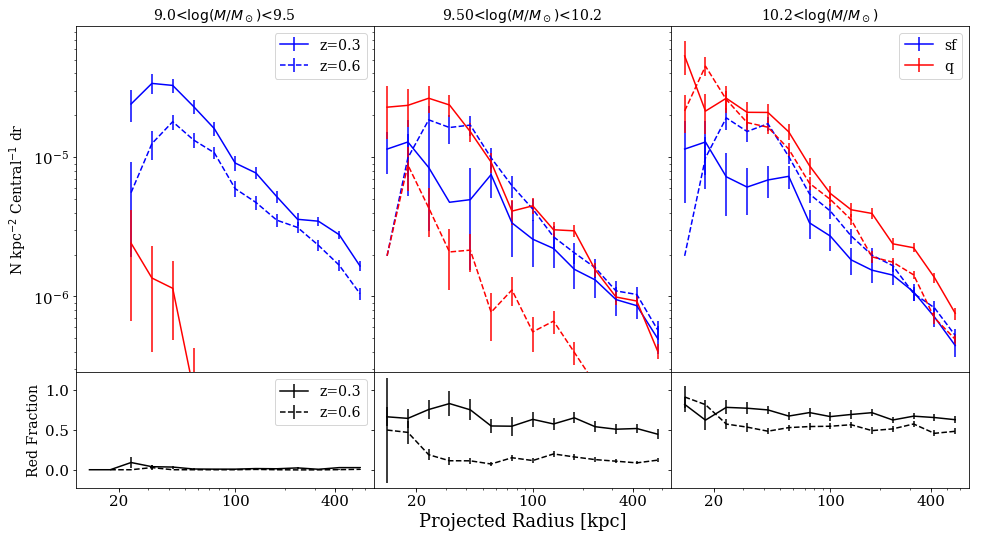

In [20]:
def red_frac_err(q, sf, q_err, sf_err):
    return np.sqrt( (sf**2*q_err**2 + q**2*sf_err**2) / ((q+sf)**4) )

radial_3_sf_l = combine_deep('sf','9.0',0.3)
radial_3_sf_m = combine_deep('sf','9.5',0.3)
radial_3_sf_h = combine_deep('sf','10.2',0.3)
radial_3_q_l = combine_deep('q','9.0',0.3)
radial_3_q_m = combine_deep('q','9.5',0.3)
radial_3_q_h = combine_deep('q','10.2',0.3)
radial_6_sf_l = combine_deep('sf','9.0',0.6)
radial_6_sf_m = combine_deep('sf','9.5',0.6)
radial_6_sf_h = combine_deep('sf','10.2',0.6)
radial_6_q_l = combine_deep('q','9.0',0.6)
radial_6_q_m = combine_deep('q','9.5',0.6)
radial_6_q_h = combine_deep('q','10.2',0.6)
bin_edges = np.load('bin_edges.npy')

redfrac_err_3_l = red_frac_err(radial_3_q_l[0],radial_3_sf_l[0],radial_3_q_l[1],radial_3_sf_l[1])
redfrac_err_6_l = red_frac_err(radial_6_q_l[0],radial_6_sf_l[0],radial_6_q_l[1],radial_6_sf_l[1])
redfrac_err_3_m = red_frac_err(radial_3_q_m[0],radial_3_sf_m[0],radial_3_q_m[1],radial_3_sf_m[1])
redfrac_err_6_m = red_frac_err(radial_6_q_m[0],radial_6_sf_m[0],radial_6_q_m[1],radial_6_sf_m[1])
redfrac_err_3_h = red_frac_err(radial_3_q_h[0],radial_3_sf_h[0],radial_3_q_h[1],radial_3_sf_h[1])
redfrac_err_6_h = red_frac_err(radial_6_q_h[0],radial_6_sf_h[0],radial_6_q_h[1],radial_6_sf_h[1])

print(redfrac_err_3_m)

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
fig, axs = plt.subplots(2, 3, sharex=True, sharey='row', figsize=(16, 8.5),gridspec_kw={'height_ratios':[3,1]})
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
bin_edges = np.load('bin_edges.npy')

#====================Radial Distribution ===================
axs[0][0].errorbar(bin_edges[1:], radial_3_sf_l[0], yerr=radial_3_sf_l[1], fmt='b',label='z=0.3')
axs[0][0].errorbar(bin_edges[1:], radial_6_sf_l[0], yerr=radial_6_sf_l[1], fmt='--b',label='z=0.6')

axs[0][0].set_title(r'9.0<$\log(M/M_\odot)$<9.5',fontsize=14)
axs[0][0].set_xlabel('Projected Radius [kpc]', fontsize=14)
axs[0][0].set_ylabel(r'N kpc$^{-2}$ Central$^{-1}$ dr',fontsize=14)

axs[0][1].errorbar(bin_edges[1:], radial_3_sf_m[0], yerr=radial_3_sf_m[1], fmt='b')
axs[0][1].errorbar(bin_edges[1:], radial_6_sf_m[0], yerr=radial_6_sf_m[1], fmt='--b')
axs[0][1].set_xlabel('Projected Radius [kpc]', fontsize=14)
axs[0][1].set_title(r'9.50<$\log(M/M_\odot)$<10.2',fontsize=14)

axs[0][2].errorbar(bin_edges[1:], radial_3_sf_h[0], yerr=radial_3_sf_h[1],fmt='b',label='sf')
axs[0][2].errorbar(bin_edges[1:], radial_6_sf_h[0], yerr=radial_6_sf_h[1],fmt='--b')
axs[0][2].set_title(r'10.2<$\log(M/M_\odot)$',fontsize=14)
axs[0][2].legend(fontsize=14)

axs[0][0].errorbar(bin_edges[1:], radial_3_q_l[0], yerr=radial_3_q_l[1],fmt='r')
axs[0][0].errorbar(bin_edges[1:], radial_6_q_l[0], yerr=radial_6_q_l[1],fmt='--r')
axs[0][0].legend(fontsize=14)

axs[0][1].errorbar(bin_edges[1:], radial_3_q_m[0], yerr=radial_3_q_m[1],fmt='r')
axs[0][1].errorbar(bin_edges[1:], radial_6_q_m[0], yerr=radial_6_q_m[1],fmt='--r')

axs[0][2].errorbar(bin_edges[1:], radial_3_q_h[0], yerr=radial_3_q_h[1],fmt='r',label='q')
axs[0][2].errorbar(bin_edges[1:], radial_6_q_h[0], yerr=radial_6_q_h[1],fmt='--r')
axs[0][2].legend(fontsize=14)

axs[0][0].set_yscale('log')
axs[0][0].set_xscale('log')
axs[0][0].set_xticks([20, 100, 400])
axs[0][0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

#================Red Fraction========================
axs[1][0].errorbar(bin_edges[1:], radial_3_q_l[0]/(radial_3_sf_l[0]+radial_3_q_l[0]),fmt='k',yerr=redfrac_err_3_l,label='z=0.3')
axs[1][0].errorbar(bin_edges[1:], radial_6_q_l[0]/(radial_6_sf_l[0]+radial_6_q_l[0]),fmt='--k',yerr=redfrac_err_6_l,label='z=0.6')
axs[1][0].set_ylabel('Red Fraction',fontsize=14)
axs[1][0].legend(fontsize=14)

axs[1][1].errorbar(bin_edges[1:], radial_3_q_m[0]/(radial_3_sf_m[0]+radial_3_q_m[0]),fmt='k',yerr=redfrac_err_3_m)
axs[1][1].errorbar(bin_edges[1:], radial_6_q_m[0]/(radial_6_sf_m[0]+radial_6_q_m[0]),fmt='--k',yerr=redfrac_err_6_m)

axs[1][2].errorbar(bin_edges[1:], radial_3_q_h[0]/(radial_3_sf_h[0]+radial_3_q_h[0]),fmt='k',yerr=redfrac_err_3_h)
axs[1][2].errorbar(bin_edges[1:], radial_6_q_h[0]/(radial_6_sf_h[0]+radial_6_q_h[0]),fmt='--k',yerr=redfrac_err_6_h)

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel('Projected Radius [kpc]', fontsize=18)
plt.savefig('splitting_redfraction.png')
plt.show()

In [56]:
# combine results from 4 deep layer catalogs and SXDS_uddd

def combine_deep_central_sfq(c_sfq, s_sfq, z, mode='count'):
    radial_COSMOS = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'COSMOS_deep_'+c_sfq+'_'+s_sfq+'_'+str(z)+'.npy')
    radial_DEEP = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'DEEP_deep_'+c_sfq+'_'+s_sfq+'_'+str(z)+'.npy')
    radial_SXDS = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'SXDS_uddd_'+c_sfq+'_'+s_sfq+'_'+str(z)+'.npy')
    radial_ELAIS = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'ELAIS_deep_'+c_sfq+'_'+s_sfq+'_'+str(z)+'.npy')
    radial_XMM = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'XMM-LSS_deep_'+c_sfq+'_'+s_sfq+'_'+str(z)+'.npy')
    
    radial_COSMOS_err = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'COSMOS_deep_'+c_sfq+'_'+s_sfq+'_'+str(z)+'_err.npy')
    radial_DEEP_err = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'DEEP_deep_'+c_sfq+'_'+s_sfq+'_'+str(z)+'_err.npy')
    radial_SXDS_err = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'SXDS_uddd_'+c_sfq+'_'+s_sfq+'_'+str(z)+'_err.npy')
    radial_ELAIS_err = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'ELAIS_deep_'+c_sfq+'_'+s_sfq+'_'+str(z)+'_err.npy')
    radial_XMM_err = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'XMM-LSS_deep_'+c_sfq+'_'+s_sfq+'_'+str(z)+'_err.npy')
    
    if z==0.6 and c_sfq=='csf':
        radial_total = (radial_COSMOS*225+radial_XMM*126+radial_ELAIS*108+radial_SXDS*47+radial_DEEP*143)/(225.+108+126+143+47)
        radial_total_err = np.sqrt(radial_COSMOS_err**2*225**2+radial_XMM_err**2*126**2+radial_ELAIS_err**2*108**2+radial_SXDS_err**2*47**2+radial_DEEP_err**2*143**2)/(225.+108+126+143+47)
    elif z==0.3 and c_sfq=='csf':
        radial_total = (radial_COSMOS*43+radial_XMM*23+radial_ELAIS*36+radial_SXDS*13+radial_DEEP*24)/(43.+36+23+24+47)
        radial_total_err = np.sqrt(radial_COSMOS_err**2*43**2+radial_XMM_err**2*23**2+radial_ELAIS_err**2*36**2+radial_SXDS_err**2*13**2+radial_DEEP_err**2*24**2)/(43.+36+23+24+47)
    elif z==0.6 and c_sfq=='cq':
        radial_total = (radial_COSMOS*373+radial_XMM*341+radial_ELAIS*293+radial_SXDS*131+radial_DEEP*303)/(373.+293+341+303+131)
        radial_total_err = np.sqrt(radial_COSMOS_err**2*373**2+radial_XMM_err**2*341**2+radial_ELAIS_err**2*293**2+radial_SXDS_err**2*131**2+radial_DEEP_err**2*303**2)/(373.+293+341+303+131)
    elif z==0.3 and c_sfq=='cq':
        radial_total = (radial_COSMOS*273+radial_XMM*224+radial_ELAIS*192+radial_SXDS*79+radial_DEEP*165)/(273.+192+224+165+79)
        radial_total_err = np.sqrt(radial_COSMOS_err**2*273**2+radial_XMM_err**2*224**2+radial_ELAIS_err**2*192**2+radial_SXDS_err**2*79**2+radial_DEEP_err**2*165**2)/(316.+247+228+92+189)
    else:
        radial_total = 0
        radial_total_err = 0
                               
    return radial_total, radial_total_err

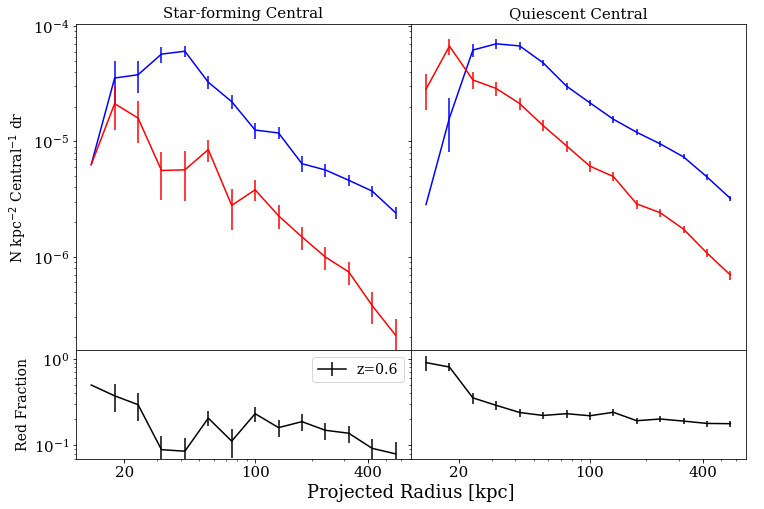

In [70]:
def red_frac_err(q, sf, q_err, sf_err):
    return np.sqrt( (sf**2*q_err**2 + q**2*sf_err**2) / ((q+sf)**4) )

radial_cq_sq_6 = combine_deep_central_sfq('cq','sq',0.6)
radial_cq_ssf_6 = combine_deep_central_sfq('cq','ssf',0.6)
radial_csf_sq_6 = combine_deep_central_sfq('csf','sq',0.6)
radial_csf_ssf_6 = combine_deep_central_sfq('csf','ssf',0.6)

redfrac_err_cq_6 = red_frac_err(radial_cq_sq_6[0],radial_cq_ssf_6[0],radial_cq_sq_6[1],radial_cq_ssf_6[1])
redfrac_err_csf_6 = red_frac_err(radial_csf_sq_6[0],radial_csf_ssf_6[0],radial_csf_sq_6[1],radial_csf_ssf_6[1])
bin_edges = np.load('bin_edges.npy')

fig, axs = plt.subplots(2, 2, sharex=True,sharey='row', figsize=(12, 8),gridspec_kw={'height_ratios':[3,1]})
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

axs[0][0].errorbar(bin_edges[1:], radial_csf_ssf_6[0], yerr=radial_csf_ssf_6[1], fmt='b')
axs[0][0].errorbar(bin_edges[1:], radial_csf_sq_6[0], yerr=radial_csf_sq_6[1], fmt='r')
axs[0][1].errorbar(bin_edges[1:], radial_cq_ssf_6[0], yerr=radial_cq_ssf_6[1], fmt='b')
axs[0][1].errorbar(bin_edges[1:], radial_cq_sq_6[0], yerr=radial_cq_sq_6[1], fmt='r')

axs[0][0].set_ylabel(r'N kpc$^{-2}$ Central$^{-1}$ dr',fontsize=14)
axs[0][0].set_title('Star-forming Central',fontsize=15)
axs[0][1].set_title('Quiescent Central',fontsize=15)

axs[1][0].errorbar(bin_edges[1:], radial_csf_sq_6[0]/(radial_csf_sq_6[0]+radial_csf_ssf_6[0]),fmt='k',yerr=redfrac_err_csf_6,label='z=0.6')
axs[1][1].errorbar(bin_edges[1:], radial_cq_sq_6[0]/(radial_cq_sq_6[0]+radial_cq_ssf_6[0]),fmt='k',yerr=redfrac_err_cq_6)
axs[1][0].set_ylabel('Red Fraction',fontsize=14)
axs[1][0].legend(fontsize=14)
axs[1][0].set_ylabel('Red Fraction', fontsize=14)
axs[1][0].set_yscale('log')


axs[0][0].set_xscale('log')
axs[0][0].set_yscale('log')
axs[0][0].set_xticks([20, 100, 400])
axs[0][0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel('Projected Radius [kpc]', fontsize=18)
plt.savefig('splitting_central_sfq.png')
plt.show()